# Le pouvoir d'achat des ouvriers anglais du 16ème au 19ème siècle

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Les données -- des suites chronologiques du prix du boisseau de blé et du salaire hebdomadaire d'un ouvrier qualifié en Angleterre entre 1565 et 1821 -- ont été compilées par [William Playfair](http://fr.wikipedia.org/wiki/William_Playfair) et publiées en 1821 dans son livre _Letter on our Agricultural Distresses, Their Causes and Remedies._. Ces données sont disponibles au format `csv` à partir du site [Rdatasets](https://github.com/vincentarelbundock/Rdatasets) sur GitHub. C'est cette dernière voie que nous allons employer. L'URL complète des données est : <https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv>. Nous pouvons les lire directement avec pandas :

In [3]:
ble = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv")

Nous vérifions alors rapidement que le téléchargement suivi de la lecture des données s'est déroulé correctement en regardant le nom des variables du tableau de données ainsi que ses premières lignes :

In [4]:
ble.columns

Index(['Unnamed: 0', 'Year', 'Wheat', 'Wages'], dtype='object')

In [5]:
ble.head()

Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

Nous voyons que la première colonne (intitulée `Unnamed: 0`) est inutile et nous la supprimons, puis nous pouvons franciser les impressions de résultats avec :

In [6]:
del ble[ble.columns[0]]
ble.columns = ["Année", "Blé", "Salaire"]

Nous reproduisons le [graphe montrant la co-évolution du prix du blé et du salaire](http://fr.wikipedia.org/wiki/William_Playfair#mediaviewer/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png):

(-5, 105)

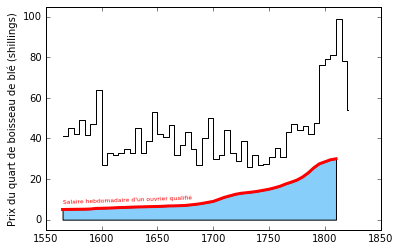

In [7]:
plt.step(ble["Année"], ble["Blé"], color="black", where="post")
plt.ylabel(u"Prix du quart de boisseau de blé (shillings)")

salaire_connu = ble.dropna(how="any")
plt.plot(salaire_connu["Année"], salaire_connu["Salaire"], color="red", linewidth=3)
plt.fill_between(salaire_connu["Année"], salaire_connu["Salaire"], facecolor="LightSkyBlue")
plt.text(1565, 10, u"Salaire hebdomadaire d'un ouvrier qualifié",
         color="red", fontsize=6, rotation=2)

plt.ylim(-5, 105)

Pour comparaison, le plot d'origine de William Playfair:

<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png">

Une autre façon simple de comparer les deux montants est de calculer le pouvoir d'achat, en divisane le prix du blé par le salaire de la même année :

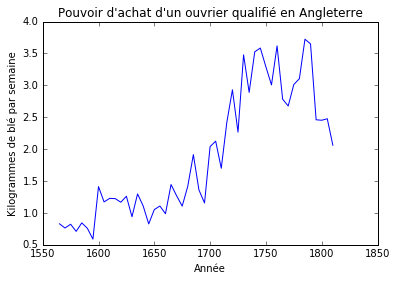

In [22]:
plt.plot(ble["Année"], 6.8 * ble["Salaire"] / ble["Blé"])
plt.xlabel("Année")
plt.ylabel("Kilogrammes de blé par semaine")
plt.title("Pouvoir d'achat d'un ouvrier qualifié en Angleterre")

On peut aussi mettre les deux prix sur les deux axes. On perd ainsi la suite chronologique, ce qui n'est pas très grave ici parce que les salaires augmentent de façon monotone. On pourrait utiliser un gradient de couleur sur une ligne qui relie les points, mais ce n'est pas facile avec matplotlib.

(0, 30.0)

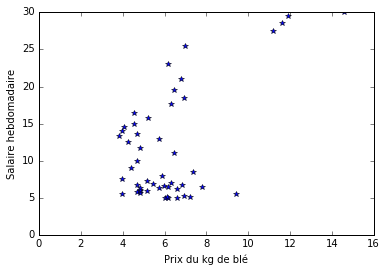

In [23]:
plt.plot(ble["Blé"]/6.8, ble["Salaire"], "b*")
plt.xlabel("Prix du kg de blé")
plt.ylabel("Salaire hebdomadaire")
plt.xlim(0, None)
plt.ylim(0, None)